In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 12)

In [2]:
import pandas as pd

In [3]:
def load_analysis(path: str, prefix: str):
    return (
        pd
        .read_csv(path, index_col=0)
        .set_index(['dim'])
        .add_prefix(f'{prefix}_')
    )

In [4]:
collation = [
    load_analysis(path, prefix)
    for prefix, path in [
        ('base', 'analysis-base.csv'),
        ('textattack', 'analysis-textattack.csv'),
        ('fabriceyhc', 'analysis-fabriceyhc.csv'),
        ('wakaka', 'analysis-wakaka.csv')
    ]
]
collation

[     base_dispersion_positive  base_dispersion_negative  base_distance
 dim                                                                   
 768              1.665069e+06              1.069949e+06       1.251342
 576              1.665990e+06              1.070803e+06       1.184022
 384              1.665881e+06              1.070745e+06       1.183920
 192              1.665307e+06              1.070273e+06       1.206436
 96               1.664282e+06              1.069415e+06       1.232434
 48               1.661879e+06              1.067403e+06       1.309405
 24               1.656779e+06              1.063651e+06       1.410591
 12               1.644861e+06              1.053681e+06       1.685063
 6                1.626873e+06              1.039705e+06       1.586060
 3                1.578766e+06              9.972874e+05       1.550226,
      textattack_dispersion_positive  textattack_dispersion_negative  \
 dim                                                           

In [5]:
collation_df = pd.concat(collation, axis=1)
collation_df

,base_dispersion_positive,base_dispersion_negative,base_distance,textattack_dispersion_positive,textattack_dispersion_negative,textattack_distance,fabriceyhc_dispersion_positive,fabriceyhc_dispersion_negative,fabriceyhc_distance,wakaka_dispersion_positive,wakaka_dispersion_negative,wakaka_distance
dim,,,,,,,,,,,,
768,1.665069e+06,1.069949e+06,1.251342,1.936666e+06,1.245197e+06,7.870501,1.709004e+06,1.349562e+06,22.700799,2.274141e+06,1.361793e+06,11.399911
576,1.665990e+06,1.070803e+06,1.184022,1.936996e+06,1.245416e+06,7.871884,1.709429e+06,1.349943e+06,22.701073,2.274594e+06,1.362073e+06,11.401990
384,1.665881e+06,1.070745e+06,1.183920,1.936735e+06,1.245200e+06,7.874029,1.709368e+06,1.349906e+06,22.701080,2.274403e+06,1.361904e+06,11.402914
192,1.665307e+06,1.070273e+06,1.206436,1.935962e+06,1.244544e+06,7.880069,1.709093e+06,1.349721e+06,22.701409,2.273787e+06,1.361416e+06,11.405447
96,1.664282e+06,1.069415e+06,1.232434,1.934237e+06,1.243128e+06,7.892990,1.708548e+06,1.349361e+06,22.701763,2.272424e+06,1.360355e+06,11.410621
48,1.661879e+06,1.067403e+06,1.309405,1.930401e+06,1.239985e+06,7.921559,1.707356e+06,1.348583e+06,22.702989,2.269386e+06,1.357749e+06,11.425300
24,1.656779e+06,1.063651e+06,1.410591,1.921991e+06,1.233214e+06,7.983278,1.704511e+06,1.346745e+06,22.705339,2.262428e+06,1.352331e+06,11.455480
12,1.644861e+06,1.053681e+06,1.685063,1.903017e+06,1.217892e+06,8.116464,1.697146e+06,1.341956e+06,22.713308,2.246036e+06,1.339156e+06,11.530741
6,1.626873e+06,1.039705e+06,1.586060,1.853819e+06,1.179741e+06,8.439162,1.675997e+06,1.326900e+06,22.738131,2.201144e+06,1.305855e+06,11.733282


In [6]:
collation_df.filter(regex=".*_distance").describe()

,base_distance,textattack_distance,fabriceyhc_distance,wakaka_distance
count,10.000000,10.000000,10.000000,10.000000
mean,1.359950,8.109320,22.728424,11.550214
std,0.186103,0.436392,0.067721,0.295024
min,1.183920,7.870501,22.700799,11.399911
25%,1.212936,7.875539,22.701162,11.403547
50%,1.280374,7.907275,22.702376,11.417961
75%,1.515317,8.083167,22.711315,11.511926
max,1.685063,9.243265,22.918353,12.336457


array([<AxesSubplot:xlabel='Dimension', ylabel='Distance'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Distance'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Distance'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Distance'>], dtype=object)

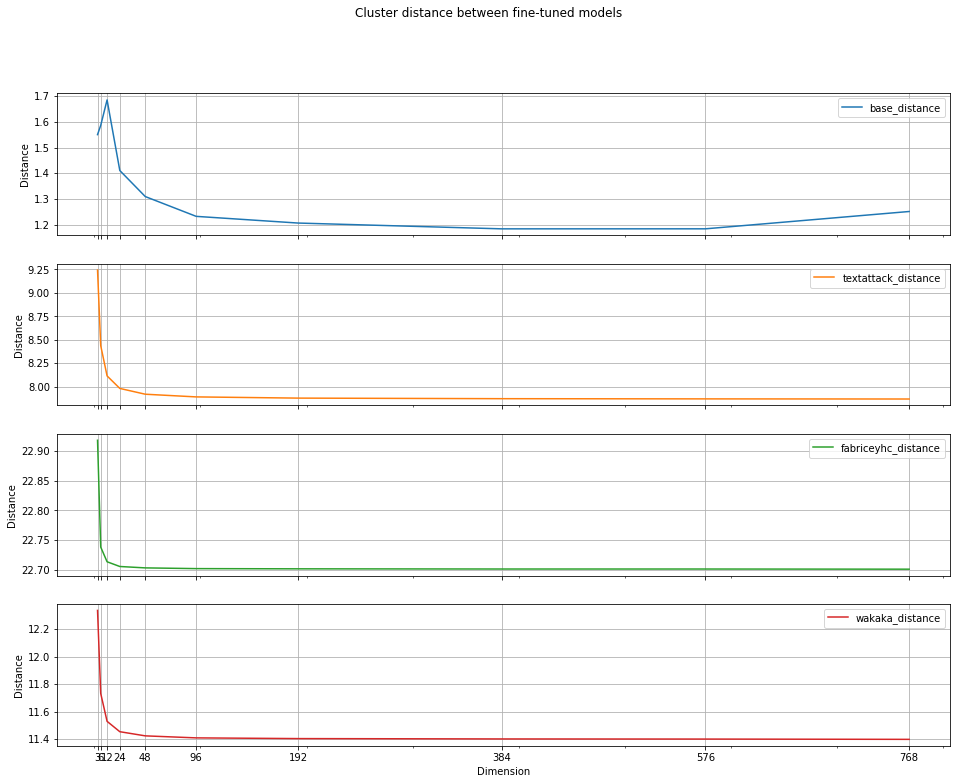

In [7]:
(
    collation_df
    .filter(regex=".*_distance")
    .plot(
        subplots=True,
        stacked=True,
        xticks=collation_df.index,
        grid=True,
        title='Cluster distance between fine-tuned models',
        xlabel='Dimension',
        ylabel='Distance'
    )
)

In [8]:
collation_df.filter(regex=".*_dispersion_positive").describe()

,base_dispersion_positive,textattack_dispersion_positive,fabriceyhc_dispersion_positive,wakaka_dispersion_positive
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.649569e+06,1.900058e+06,1.691094e+06,2.242467e+06
std,2.787664e+04,7.140650e+04,4.022528e+04,6.269929e+04
min,1.578766e+06,1.710758e+06,1.580486e+06,2.076323e+06
25%,1.647841e+06,1.907761e+06,1.698988e+06,2.250134e+06
50%,1.663080e+06,1.932319e+06,1.707952e+06,2.270905e+06
75%,1.665247e+06,1.936490e+06,1.709071e+06,2.274052e+06
max,1.665990e+06,1.936996e+06,1.709429e+06,2.274594e+06


array([<AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>],
      dtype=object)

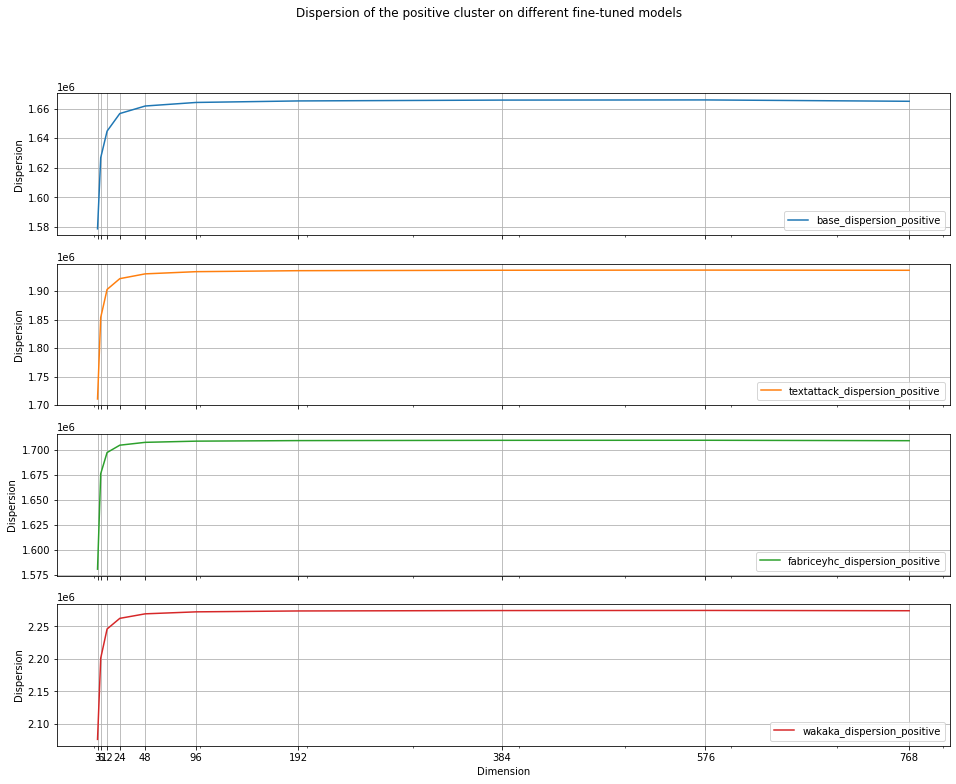

In [9]:
(
    collation_df
    .filter(regex=".*_dispersion_positive")
    .plot(
        subplots=True,
        stacked=True,
        xticks=collation_df.index,
        grid=True,
        title='Dispersion of the positive cluster on different fine-tuned models',
        xlabel='Dimension',
        ylabel='Dispersion'
    )
)

In [10]:
collation_df.filter(regex=".*_dispersion_negative").describe()

,base_dispersion_negative,textattack_dispersion_negative,fabriceyhc_dispersion_negative,wakaka_dispersion_negative
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.057291e+06,1.216932e+06,1.338423e+06,1.337266e+06
std,2.334465e+04,5.393759e+04,2.455138e+04,4.803648e+04
min,9.972874e+05,1.075000e+06,1.271556e+06,1.210024e+06
25%,1.056174e+06,1.221722e+06,1.343153e+06,1.342450e+06
50%,1.068409e+06,1.241557e+06,1.348972e+06,1.359052e+06
75%,1.070192e+06,1.245034e+06,1.349681e+06,1.361699e+06
max,1.070803e+06,1.245416e+06,1.349943e+06,1.362073e+06


array([<AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>,
       <AxesSubplot:xlabel='Dimension', ylabel='Dispersion'>],
      dtype=object)

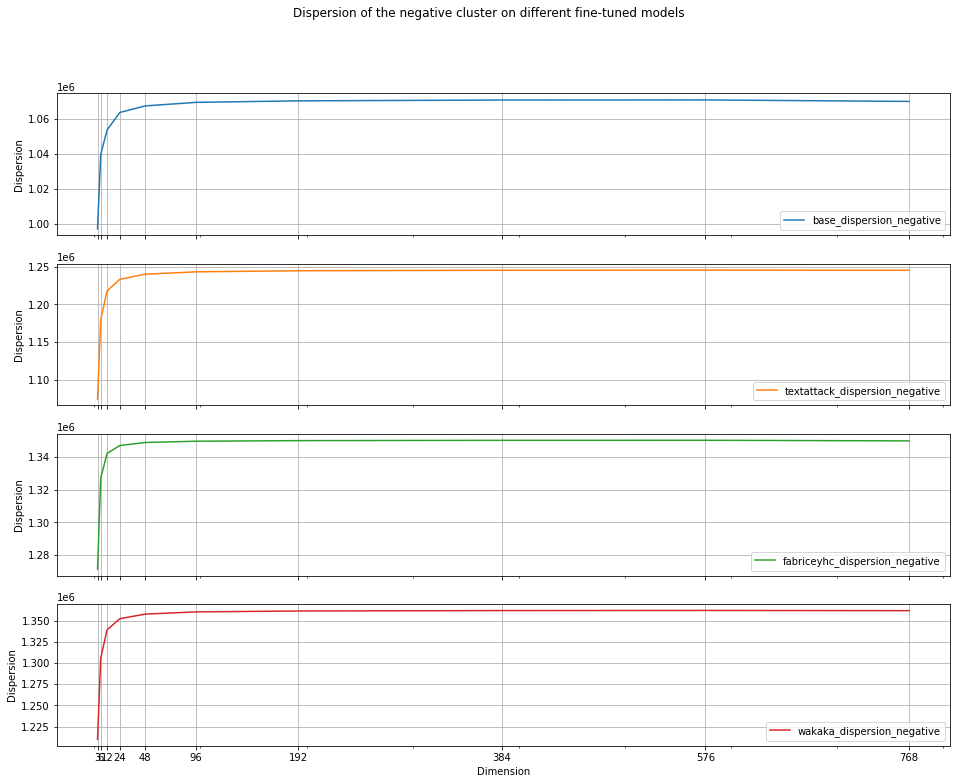

In [11]:
(
    collation_df
    .filter(regex=".*_dispersion_negative")
    .plot(
        subplots=True,
        stacked=True,
        xticks=collation_df.index,
        grid=True,
        title='Dispersion of the negative cluster on different fine-tuned models',
        xlabel='Dimension',
        ylabel='Dispersion'
    )
)